In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


# Exercises Chapter 3 - ITSL -James

---


## Linear Regression

---

---
## _Conceptual_

### Excercise 1)
Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

---

### _Solution:_

- **Intercept:** $p-value < 0.001$ <br>
We reject the null hipothesis $H_0: \beta_{0} = 0$ because the p value is significantly litte.


- **TV:** $p-value < 0.001$<br>
We see that the p value is very little so, as with the intercept, we reject $H_0$ for TV, i.e. the budget we use for TV publicity is statistically significant and it impacts over the sales.


- **radio:** $pvalue < 0.001$<br>
Similarly, we reject the null hipothesis in the case of the radio, and this means that the budget we destinate to radio advertising has an impact in tha sales.

- **newspaper:** $pvalue = 0.8599$<br>
This p value is big, so it is not significant for our response variable, i.e. If we fix an arbitrary value for the radio and TV budgets, the newspaper budget doesn't impact the sales ovel all. This means that we can take out this variable of the model.

---

### Excercise 2)
Carefully explain the differences between the KNN classifier and KNN
regression methods.

---

### _Solution:_

- **KNN Classificator:** This has a cualitative response variable and it trys to predict the class where the response belongs computing the local probability.


- **KNN Regresor:** This has a cuantitative response variable and it trys to predict the value of that response computing the local mean.


---

### Excercise 3)
Suppose we have a data set with five predictors, X1 =GPA, X2 = IQ, X3 = Gender (1 for Female and 0 forMale), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get ˆβ0 = 50, ˆβ1 = 20, ˆβ2 = 0.07, ˆβ3 = 35, ˆβ4 = 0.01, ˆβ5 = −10.

---


### _Solution:_

- **a)** Which answer is correct, and why?
    1. For a fixed value of IQ and GPA, males earn more on average
than females.
    - For a fixed value of IQ and GPA, females earn more on
average than males.
    - For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough.
    - For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.


In order to answer this question first, we declare 2 functions to compute the salary after grad for both: women and men. We compute the salary in terms of the model that is raised in the problem, fixing an IQ to 80 ($x_2 = 80$)

$$
\hat{y} = 50 + 20x_1 + 0.07x_2 +35x_3 +0.01x_4 - 10x_5
$$

Where; $x_4 = x_1x_2, \; x_5=x_1x_3$

In [45]:
# functions
def salario_hombres(gpas):
    sal = []
    for gpa in gpas:
        sal.append(60+20*gpa+0.07*80+35*0+0.01*gpa*80-10*0*gpa)
    return sal

def salario_mujeres(gpas):
    salarios = []
    for gpa in gpas:
        salarios.append(60+20*gpa+0.07*80+35*1+0.01*gpa*80-10*1*gpa)
    return salarios

Now that we have a way to compute our predictions , we need our array of possible GPA's, in this case:

``gpas = [1.0, 1.1, 1.2, ..., 4.0]``

In [50]:
#GPA's
gpas = np.linspace(1,4,28)

In the chart below, we can see that the salary for women is higher until the GPA is equal to 3.5, so the answer to a) is **4.For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.**

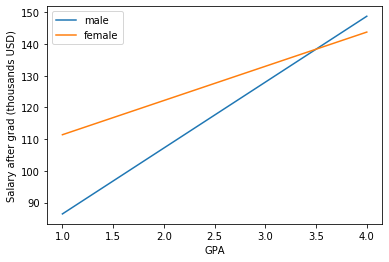

In [53]:
plt.plot(gpas,salario_hombres(gpas))
plt.plot(gpas,salario_mujeres(gpas))
plt.xlabel("GPA")
plt.ylabel("Salary after grad (thousands USD)")
plt.legend(["male","female"])

**b)** Predict the salary of a female with IQ of 110 and a GPA of 4.0.

---


To compute this, I made the following function:

In [52]:
def female_salary(gpa,iq):
    """
    Function that returns the predicted salary with the model of the excercise 2
    
    args:
        gpas: float, gpa grade of the person
        iq: float, IQ of the person
        
    return:
        salary: float, predicted salary of a female afeter grad
    """
    salary = (60+20*gpa+0.07*iq+35*1+0.01*gpa*iq-10*1*gpa)
    return salary

female_salary(4.0,110)

147.1

Therefore, the searched salary is: **147.1 USD**

---

**c)** True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.


**False**. Because the coefficient of the interaction term can be interpreted as the increase in the effectiveness of GPA for one unit of increase in IQ (or vice-versa). So if we increase 1 IQ it is likely to increase the GPA in 0.01, and with that 0.01 in GPA the Salary predicted can increase singificantly.

### Exercise 4)
I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. $Y =
\beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$.

---
**a)** Suppose that the true relationship between X and Y is linear,
i.e. $Y = \beta_0 + \beta_1X + \epsilon$. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.


In [69]:
# Real Model Y = 11.5 + 3.4X + e
n_samples = 100
errors = np.random.normal(0,5,n_samples)
X = 20*np.random.random_sample(n_samples)
F_X = 11.5 + 3.4*X
Y =  F_X + errors

In [71]:
# Fitted Linear Model 
lm = LinearRegression()
lm.fit(X.reshape(-1,1),Y)
beta_0 = lm.intercept_
beta_1 = lm.coef_
Y_est = beta_0 + beta_1*X

In [72]:
# Fitted Cubic Model
polyfit = np.polyfit(X,Y,3)
X_cubic = np.array([X,X**2,X**3])
Ycubic_est = polyfit[3] + polyfit[2]*X + polyfit[1]*X**2 + polyfit[0]*X**3

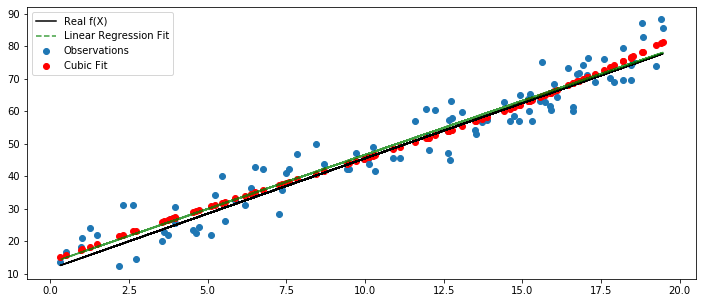

In [73]:
# Chart
plt.figure(figsize=(12,5))
plt.scatter(X,Y)
plt.plot(X,F_X, color='black')
plt.plot(X,Y_est.transpose(),color='green', linestyle='dashed', alpha=0.75)
plt.scatter(X,Ycubic_est.transpose(), color='red')
plt.legend(['Real f(X)','Linear Regression Fit','Observations', 'Cubic Fit'])

In [74]:
# RSS of the linear model 
sum((Y-Y_est)**2)

2668.556378056991

In [75]:
# RSS of the cubic model
sum((Y-Ycubic_est)**2)

2537.706002366732

Clearly, even if we use the same exact linear dataset for each iteration, the tendency is to a progressive decrease in RSS with increasing polynomial degree in the model. But if we test the 2 models with new data, what model would be better?

In [78]:
errors_test = np.random.normal(0,5,20)
X_test = 20*np.random.random_sample(20)
F_X_test = 11.5 + 3.4*X_test
Y_test = F_X_test + errors_test

In [79]:
Y_est_test = beta_0 + beta_1*X_test
Ycubic_est_test = polyfit[3] + polyfit[2]*X_test + polyfit[1]*X_test**2 + polyfit[0]*X_test**3

In [80]:
# Test RSS of the linear model
sum((Y_test-Y_est_test)**2)

565.7330555596639

In [81]:
# Test RSS of the cubic model
sum((Y_test-Ycubic_est_test)**2)

628.4725465367568

So, the linear model makes less mistakes with new data, that means that although the cubic model has  lesser RRS than the linear model in the training data, the cubic is overfitted and with new data it is less accurate than the linear.